---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [3]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [4]:
#import matplotlib.pyplot as plt

# look at the log-log plot for each graph
#degrees = P1_Graphs[3].degree()
#degree_values = sorted(set(degrees.values()))
#histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(P1_Graphs[0])) for i in degree_values]

#plt.plot(degree_values,histogram,'o')
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

In [5]:
def graph_identification():
    
    # get the average clustering coefficient for each graph
    avg_clust_coeff = []    
    for i in range(0,5):
        clust = nx.average_clustering(P1_Graphs[i])
        avg_clust_coeff.append(clust)
        
    # get the average shortest path length for each graph
    avg_path_length = []
    for i in range(0,5):
        path = nx.average_shortest_path_length(P1_Graphs[i])
        avg_path_length.append(path)    
    
    checks = (avg_clust_coeff,avg_path_length)
    output = ['PA','SW_L','SW_L','PA','SW_H']
    
    return output
graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagementSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagementSalary` indicates whether that person is receiving a management position salary.

In [2]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a management position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a management salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a management position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving management salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

### Create some features

In [7]:
#G.nodes(data=True)

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (2, {'Department': 21, 'ManagementSalary': nan}),
 (3, {'Department': 21, 'ManagementSalary': 1.0}),
 (4, {'Department': 21, 'ManagementSalary': 1.0}),
 (5, {'Department': 25, 'ManagementSalary': nan}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (7, {'Department': 14, 'ManagementSalary': 0.0}),
 (8, {'Department': 14, 'ManagementSalary': nan}),
 (9, {'Department': 14, 'ManagementSalary': 0.0}),
 (10, {'Department': 9, 'ManagementSalary': 0.0}),
 (11, {'Department': 14, 'ManagementSalary': 0.0}),
 (12, {'Department': 14, 'ManagementSalary': 1.0}),
 (13, {'Department': 26, 'ManagementSalary': 1.0}),
 (14, {'Department': 4, 'ManagementSalary': nan}),
 (15, {'Department': 17, 'ManagementSalary': 0.0}),
 (16, {'Department': 34, 'ManagementSalary': 0.0}),
 (17, {'Department': 1, 'ManagementSalary': 0.0}),
 (18, {'Department': 1, 'ManagementSalary': nan}),
 (19, {'Department': 14, 'Ma

In [8]:
# # Initialize the dataframe, using the nodes as the index
# df = pd.DataFrame(index=G.nodes())

# # Get the department for each node
# df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
# df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G,'ManagementSalary'))

# # Add the clustering coefficient and degree
# df['clustering'] = pd.Series(nx.clustering(G))
# df['degree'] = pd.Series(G.degree())

# #### Get the eccentricity and flag the center and periphery nodes - note that there are a few nodes that are completely 
# # disconnected - I will only calculate these values for the large connected componenet - all others will be given
# # the max eccentricity, periphery of 1 and center of 0

# graphs = list(nx.connected_component_subgraphs(G))

# # eccentricity
# eccentricity = nx.eccentricity(graphs[0])
# eccentricity =  pd.Series(eccentricity).to_frame()
# eccentricity.columns = ['eccentricity']

# # get nodes on the periphery
# periphery = nx.periphery(graphs[0])

# # Get nodes in the center
# center = nx.center(graphs[0])

# dist_measures = eccentricity

# # Add a flag for the center nodes
# center_nodes = []
# for row in dist_measures.index:
#     if row in center:
#         center_nodes.append(1)
#     else:
#         center_nodes.append(0)

# dist_measures['center'] = center_nodes

# # Add a flag for the periphery nodes
# periphery_nodes = []
# for row in dist_measures.index:
#     if row in periphery:
#         periphery_nodes.append(1)
#     else:
#         periphery_nodes.append(0)

# dist_measures['periphery'] = periphery_nodes

# df = df.merge(dist_measures,how = 'left', left_index = True, right_index = True)

# df[['center']] = df[['center']].fillna(0)
# df[['periphery']] = df[['periphery']].fillna(1)
# df[['eccentricity']] = df[['eccentricity']].fillna(max(df['eccentricity']))

# ### add degree centrality for every node
# df['degree_centrality'] = pd.Series(nx.degree_centrality(G))

# ### add closeness centrality for every node
# df['closeness_centrality'] = pd.Series(nx.closeness_centrality(G, normalized = True))

# ### add the page rank including a damping parameter
# df['page_rank'] = pd.Series(nx.pagerank(G, alpha = 0.8))

# ### add the hub and authority scores
# hits_scores = nx.hits(G)
# hub = pd.Series(hits_scores[0]).to_frame()
# hub.columns = ['hub']
# df = df.merge(hub,how = 'left', left_index = True, right_index = True)

# authority = pd.Series(hits_scores[1]).to_frame()
# authority.columns = ['authority']
# df = df.merge(authority,how = 'left', left_index = True, right_index = True)

# ### add betweeness centrality
# df['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True, endpoints = False))

# df.head(20)

,Department,ManagementSalary,clustering,degree,eccentricity,center,periphery,degree_centrality,closeness_centrality,page_rank,hub,authority,betweenness_centrality
0,1,0.0,0.276423,44,4.0,1.0,0.0,0.043825,0.421991,0.001202,0.000944,0.000944,0.001124
1,1,NaN,0.265306,52,4.0,1.0,0.0,0.051793,0.422360,0.001395,0.001472,0.001472,0.001195
2,21,NaN,0.297803,95,5.0,0.0,0.0,0.094622,0.461490,0.002531,0.002680,0.002680,0.006570
3,21,1.0,0.384910,71,5.0,0.0,0.0,0.070717,0.441663,0.001759,0.002369,0.002369,0.001654
4,21,1.0,0.318691,96,5.0,0.0,0.0,0.095618,0.462152,0.002424,0.003055,0.003055,0.005547
5,25,NaN,0.107002,171,4.0,1.0,0.0,0.170319,0.501484,0.004802,0.004011,0.004011,0.030995
6,25,1.0,0.155183,115,4.0,1.0,0.0,0.114542,0.475805,0.003045,0.002554,0.002554,0.012387
7,14,0.0,0.287785,72,5.0,0.0,0.0,0.071713,0.420156,0.001948,0.001155,0.001155,0.002818
8,14,NaN,0.447059,37,5.0,0.0,0.0,0.036853,0.413151,0.001048,0.000791,0.000791,0.000557
9,14,0.0,0.425320,40,5.0,0.0,0.0,0.039841,0.356196,0.001201,0.000351,0.000351,0.000280


### Split the data into training, testing and validation

In [10]:
# from sklearn.model_selection import train_test_split

# validation = df[df['ManagementSalary'].isnull()]
# validation.drop('ManagementSalary',axis = 1, inplace = True)

# train_test = df[df['ManagementSalary'].notnull()]

# X = train_test.drop('ManagementSalary', axis = 1)
# y = train_test['ManagementSalary'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Department,clustering,degree,eccentricity,center,periphery,degree_centrality,closeness_centrality,page_rank,hub,authority,betweenness_centrality
421,14,0.227755,52,4.0,1.0,0.0,0.051793,0.434905,0.001380,1.260578e-03,1.260578e-03,2.357596e-03
972,15,0.000000,2,6.0,0.0,0.0,0.001992,0.304174,0.000255,2.674253e-05,2.674253e-05,3.882548e-06
322,17,0.578462,28,5.0,0.0,0.0,0.027888,0.379262,0.001000,4.491841e-04,4.491841e-04,1.601630e-03
431,37,0.426877,25,5.0,0.0,0.0,0.024900,0.411918,0.000723,9.617314e-04,9.617314e-04,1.481767e-04
506,14,0.282514,63,5.0,0.0,0.0,0.062749,0.445122,0.001809,1.765178e-03,1.765178e-03,5.260409e-03
634,21,0.000000,3,7.0,0.0,1.0,0.002988,0.252775,0.000402,4.071768e-06,4.071768e-06,0.000000e+00
130,0,0.342857,37,4.0,1.0,0.0,0.036853,0.422175,0.001128,1.042496e-03,1.042496e-03,1.543093e-03
140,17,0.394062,41,5.0,0.0,0.0,0.040837,0.415460,0.001216,9.392399e-04,9.392399e-04,1.545154e-03
338,13,0.350820,63,5.0,0.0,0.0,0.062749,0.438258,0.001622,2.265181e-03,2.265181e-03,1.574018e-03
117,6,0.274510,20,5.0,0.0,0.0,0.019920,0.418881,0.000635,7.963226e-04,7.963226e-04,2.727841e-04


### Standardize the data

In [11]:
# from sklearn.preprocessing import StandardScaler

# stdsc = StandardScaler()
# X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
# X_train_std.columns = X_train.columns

# X_test_std = pd.DataFrame(stdsc.transform(X_test))
# X_test_std.columns = X_test.columns

# X_train_std.head()

,Department,clustering,degree,eccentricity,center,periphery,degree_centrality,closeness_centrality,page_rank,hub,authority,betweenness_centrality
0,0.008164,-0.629099,0.491814,-1.245178,1.536229,-0.156174,0.491814,0.735597,0.425918,0.209506,0.209506,0.139498
1,0.103853,-1.499887,-0.807182,1.750381,-0.650945,-0.156174,-0.807182,-0.965144,-0.821325,-0.768274,-0.768274,-0.318310
2,0.295232,0.711775,-0.131704,0.252602,-0.650945,-0.156174,-0.131704,0.011711,0.004479,-0.433501,-0.433501,-0.007541
3,2.209016,0.132216,-0.209644,0.252602,-0.650945,-0.156174,-0.209644,0.436546,-0.302774,-0.027322,-0.027322,-0.290244
4,0.008164,-0.419738,0.777594,0.252602,-0.650945,-0.156174,0.777594,0.868509,0.902511,0.609388,0.609388,0.704108


### Run some EDA on the variables, correlations, best subsets etc.

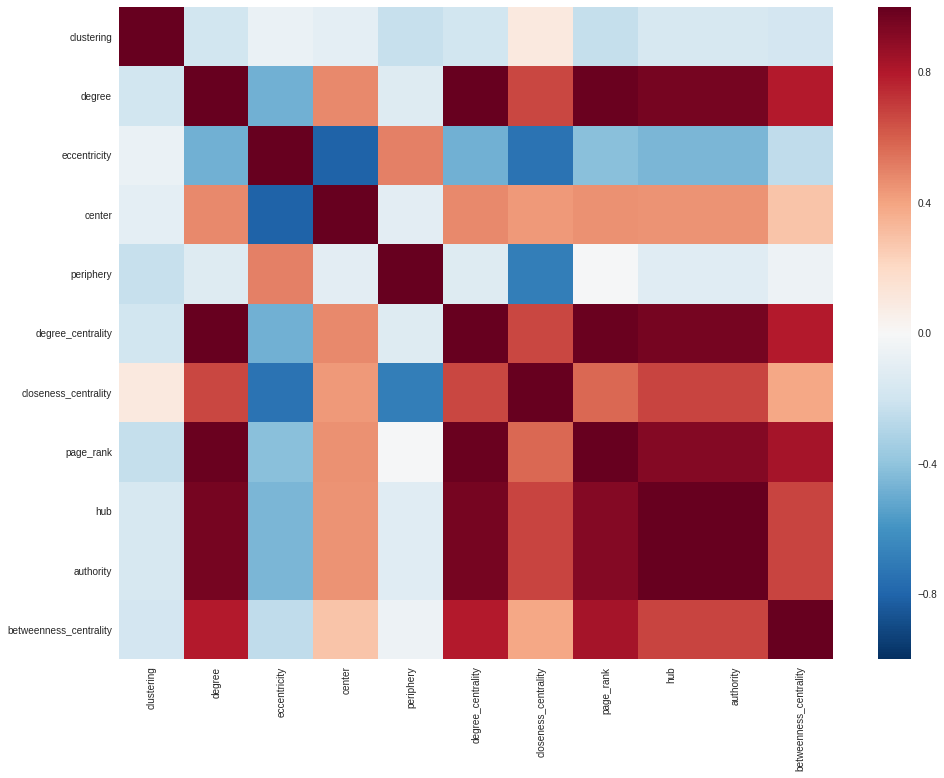

In [12]:
# # Create a correlation matrix
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline  

# corr_data = X_train.drop('Department', axis=1)
# corr = corr_data.corr('pearson')

# # Plot a heatmap - not that useful with so many variables
# plt.figure(1, figsize=(16, 12))
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

In [13]:
#corr

,clustering,degree,eccentricity,center,periphery,degree_centrality,closeness_centrality,page_rank,hub,authority,betweenness_centrality
clustering,1.000000,-0.189629,-0.070099,-0.100231,-0.234243,-0.189629,0.095839,-0.234563,-0.166313,-0.166313,-0.187088
degree,-0.189629,1.000000,-0.481392,0.478436,-0.125384,1.000000,0.671773,0.984725,0.956518,0.956518,0.795843
eccentricity,-0.070099,-0.481392,1.000000,-0.810542,0.507277,-0.481392,-0.736904,-0.418003,-0.454887,-0.454887,-0.257261
center,-0.100231,0.478436,-0.810542,1.000000,-0.101660,0.478436,0.434400,0.459957,0.447011,0.447011,0.285706
periphery,-0.234243,-0.125384,0.507277,-0.101660,1.000000,-0.125384,-0.690562,-0.015087,-0.123252,-0.123252,-0.049830
degree_centrality,-0.189629,1.000000,-0.481392,0.478436,-0.125384,1.000000,0.671773,0.984725,0.956518,0.956518,0.795843
closeness_centrality,0.095839,0.671773,-0.736904,0.434400,-0.690562,0.671773,1.000000,0.576959,0.675365,0.675365,0.387690
page_rank,-0.234563,0.984725,-0.418003,0.459957,-0.015087,0.984725,0.576959,1.000000,0.920551,0.920551,0.829481
hub,-0.166313,0.956518,-0.454887,0.447011,-0.123252,0.956518,0.675365,0.920551,1.000000,1.000000,0.676608
authority,-0.166313,0.956518,-0.454887,0.447011,-0.123252,0.956518,0.675365,0.920551,1.000000,1.000000,0.676608


In [14]:
# Show the highest correlated pairs

# corr = corr.abs()

# s = corr.unstack()
# so = s.sort_values(kind="quicksort", ascending = False)
# so

# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=100):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(corr_data, 100))

Top Absolute Correlations
degree                degree_centrality         1.000000
hub                   authority                 1.000000
degree_centrality     page_rank                 0.984725
degree                page_rank                 0.984725
                      authority                 0.956518
degree_centrality     authority                 0.956518
degree                hub                       0.956518
degree_centrality     hub                       0.956518
page_rank             authority                 0.920551
                      hub                       0.920551
                      betweenness_centrality    0.829481
eccentricity          center                    0.810542
degree                betweenness_centrality    0.795843
degree_centrality     betweenness_centrality    0.795843
eccentricity          closeness_centrality      0.736904
periphery             closeness_centrality      0.690562
authority             betweenness_centrality    0.676608
hub  

### Run some variable selection methods and keep only the most predictive variables

In [16]:
# from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel, RFECV, VarianceThreshold

# ### Remove features with zero variance ###
# selector = VarianceThreshold()
# selector.fit_transform(X_train_std)

# # keep only the variables with variance > 0
# X_train_std = X_train_std[X_train_std.columns[selector.get_support()]]
# X_test_std = X_test_std[X_test_std.columns[selector.get_support()]]

In [21]:
### Feature importance with Random Forest ###
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score, roc_curve, auc

# feat_labels = pd.DataFrame(X_train_std.columns)
# forest = RandomForestClassifier(n_estimators = 1000,
#                                random_state = 0,
#                                n_jobs = -1)
# forest.fit(X_train_std, y_train)
# importances = pd.DataFrame(forest.feature_importances_)

# rf_importances = feat_labels.merge(importances,left_index = True, right_index = True)
# rf_importances.columns = ['features','rf_importance']
# rf_importances.sort_values('rf_importance', ascending = False, inplace = True) 
# rf_importances['rf_rank'] = range(1, len(rf_importances) + 1)

# # Check for overfitting by comparing the AUC of training and validation sets
# y_score_train = forest.predict(X_train_std)
# y_score_test = forest.predict(X_test_std)

# print('Training AUC:', roc_auc_score(y_train, y_score_train))
# print('Test AUC:', roc_auc_score(y_test, y_score_test))

Training AUC: 1.0
Test AUC: 0.76853625171


In [23]:
### Feature selection with L1 regression ###
# from sklearn import linear_model
# from sklearn.linear_model import LassoCV

# # fit the model
# lr = linear_model.LogisticRegression(penalty = 'l1', C=0.1)
# lr.fit(X_train_std, y_train)

# # get the coefficients and features into a data frame and create the rank
# lr_coeff = pd.DataFrame(lr.coef_).T
# feat_labels = pd.DataFrame(X_train_std.columns[1:])
# l1_reg_coeff = feat_labels.merge(lr_coeff,left_index = True, right_index = True)
# l1_reg_coeff.columns = ['features','l1_coeff']
# l1_reg_coeff['l1_coeff_abs'] = l1_reg_coeff['l1_coeff'].abs()
# l1_reg_coeff.sort_values('l1_coeff_abs', ascending = False, inplace = True) 
# l1_reg_coeff['l1_rank'] = range(1, len(l1_reg_coeff) + 1)

# # set the rank of zero coefficents to missing
# l1_reg_coeff['l1_rank'][l1_reg_coeff['l1_coeff'] == 0] = np.nan

# # Check for overfitting by comparing the AUC of training and validation sets
# y_score_lr_train = lr.decision_function(X_train_std)
# fpr_lr_train, tpr_lr_train, _ = roc_curve(y_train, y_score_lr_train)
# roc_auc_lr_train = auc(fpr_lr_train, tpr_lr_train)

# y_score_lr_test = lr.decision_function(X_test_std)
# fpr_lr_test, tpr_lr_test, _ = roc_curve(y_test, y_score_lr_test)
# roc_auc_lr_test = auc(fpr_lr_test, tpr_lr_test)

# print('Training AUC:', roc_auc_lr_train)
# print('Validation AUC:', roc_auc_lr_test)

# # merge the l1 regression coefficients to the rf importance ranks
# var_importance = rf_importances.merge(l1_reg_coeff, on = 'features')

Training AUC: 0.90299031307
Validation AUC: 0.899863201094


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# # Keep only the features that were selected in L1
# var_importance = var_importance[var_importance['l1_coeff_abs'] > 0]

# # Calculate the mean rank and sort
# var_importance['mean_rank'] = var_importance[["rf_rank", "l1_rank"]].mean(axis=1)
# var_importance.sort_values("mean_rank", inplace = True)
# var_importance

,features,rf_importance,rf_rank,l1_coeff,l1_coeff_abs,l1_rank,mean_rank
0,betweenness_centrality,0.187696,1,0.278399,0.278399,3.0,2.0
4,authority,0.099567,5,0.390125,0.390125,1.0,3.0
2,page_rank,0.122357,3,0.214265,0.214265,4.0,3.5
6,degree,0.096342,7,0.278805,0.278805,2.0,4.5
5,hub,0.098654,6,0.201272,0.201272,5.0,5.5


In [66]:
# ### Implement K best selection method ###
# from sklearn.base import clone
# from itertools import combinations
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

# class SBS():
#     def __init__(self, estimator, k_features, scoring = roc_auc_score, test_size = 0.25, random_state = 1):
#         self.scoring = scoring
#         self.estimator = clone(estimator)
#         self.k_features = k_features
#         self.random_state = random_state
#         self.test_size = test_size
        
#     def fit(self, X, y):
#         X_train, X_test, y_train, y_test = \
#             train_test_split(X, y, test_size = self.test_size,
#                             random_state = self.random_state)
        
#         dim = X_train.shape[1]
#         self.indices_ = tuple(range(dim))
#         self.subsets_ = [self.indices_]
#         score = self._calc_score(X_train, y_train,
#                                  X_test, y_test, self.indices_)
#         self.scores_ = [score]
        
#         while dim > self.k_features:
#             scores = []
#             subsets = []
            
#             for p in combinations(self.indices_, r = dim-1):
#                 score = self._calc_score(X_train, y_train,
#                                         X_test, y_test, p)
#                 scores.append(score)
#                 subsets.append(p)
                
#             best = np.argmax(scores)
#             self.indices_ = subsets[best]
#             self.subsets_.append(self.indices_)
#             dim -= 1
            
#             self.scores_.append(scores[best])
        
#         self.k_score_ = self.scores_[-1]
        
#         return self
    
#     def transform(self, X):
#         return X[:, self.indices_]
    
#     def _calc_score(self, X_train, y_train,
#                    X_test, y_test, indices):
#         self.estimator.fit(X_train[:, indices], y_train)
#         y_pred = self.estimator.predict(X_test[:, indices])
#         score = self.scoring(y_test, y_pred)
#         return score
    

# # Run the k best class

# #knn = KNeighborsClassifier(n_neighbors = 2)
# lr = linear_model.LogisticRegression(penalty = 'l1', C=0.7)
# sbs = SBS(lr, k_features = 1)

# X_train_mat = X_train_std.as_matrix()
# y_train_mat = y_train.as_matrix()
# sbs.fit(X_train_mat, y_train)

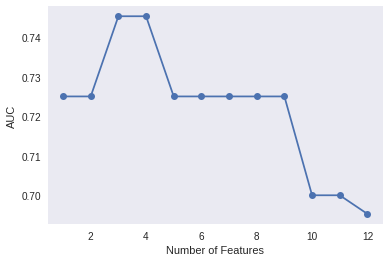

In [67]:
# k_feat = [len(k) for k in sbs.subsets_]
# plt.plot(k_feat, sbs.scores_, marker = 'o')
# plt.ylabel('AUC')
# plt.xlabel('Number of Features')
# plt.grid()
# plt.show()

In [39]:
# # Look at the solutions with the top 1-5 variables
# for i in range(len(X_train_std.columns)-5,len(X_train_std.columns)):
#     k = list(sbs.subsets_[i])
#     print(X_train_std.columns[1:][k])

Index(['clustering', 'degree', 'eccentricity', 'center', 'hub'], dtype='object')
Index(['clustering', 'degree', 'eccentricity', 'hub'], dtype='object')
Index(['clustering', 'degree', 'hub'], dtype='object')
Index(['clustering', 'hub'], dtype='object')
Index(['hub'], dtype='object')


In [40]:
# ### Univariate variable selection

# ### F Test (t-test since there are only 2 groups)

# fs = SelectKBest(score_func=f_classif, k=5)
# fit = fs.fit(X_train_std, y_train)

# selected_vars = X_train_std[X_train_std.columns[fs.get_support()]].columns
# selected_vars

Index(['degree', 'degree_centrality', 'page_rank', 'hub', 'authority'], dtype='object')

In [55]:
# ### Implement SelectFromModel

# # Use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV()

# sfm = SelectFromModel(clf, threshold = 0.0001)
# sfm.fit(X_train_std, y_train)
# n_features = sfm.transform(X_train_std).shape[1]

# while n_features > 5:
#     sfm.threshold += 0.00001
#     X_transform = sfm.transform(X_train_std)
#     n_features = X_transform.shape[1]
    
# selected_vars = X_train_std[X_train_std.columns[sfm.get_support()]].columns
# selected_vars

Index(['page_rank', 'hub'], dtype='object')

Optimal number of features : 9


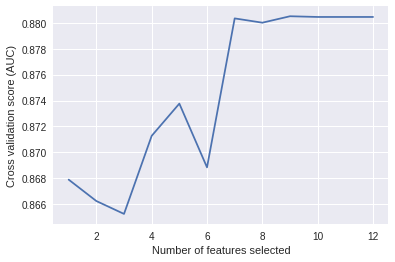

Index(['eccentricity', 'center', 'periphery', 'degree_centrality',
       'closeness_centrality', 'page_rank', 'hub', 'authority',
       'betweenness_centrality'],
      dtype='object')

In [57]:
# ### Implement RFE (Recursive Feature Elimination)

# from sklearn.model_selection import StratifiedKFold

# # Use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV()

# rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2),
#               scoring='roc_auc')

# rfecv.fit(X_train_std, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (AUC)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

# selected_vars = X_train_std[X_train_std.columns[rfecv.support_]].columns
# selected_vars

### Keep the 9 variables from the RFE

In [68]:
# X_train_std = X_train_std[['eccentricity', 'center', 'periphery', 'degree_centrality',
#        'closeness_centrality', 'page_rank', 'hub', 'authority',
#        'betweenness_centrality']]

# X_test_std = X_test_std[['eccentricity', 'center', 'periphery', 'degree_centrality',
#        'closeness_centrality', 'page_rank', 'hub', 'authority',
#        'betweenness_centrality']]

### Run different models and get the test ROC

In [70]:
# ### Random Forest ###

# from sklearn.model_selection import GridSearchCV

# rfc = RandomForestClassifier(random_state = 0) 

# param_grid = {'n_estimators': [25, 50, 100],
#               'max_features': ['auto', 'sqrt', 'log2']}
    
# CV_rfc = GridSearchCV(estimator=rfc, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_rfc.fit(X_train_std, y_train)

# # Check for overfitting by comparing the AUC of training and validation sets
# print('Accuracy of RF classifier on train set: {:.2f}'
#      .format(CV_rfc.score(X_train_std, y_train)))
# print('Accuracy of RF classifier on test set: {:.2f}'
#      .format(CV_rfc.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_rfc.best_estimator_

Accuracy of RF classifier on train set: 1.00
Accuracy of RF classifier on test set: 0.92


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [73]:
# ### L1 Regression ###

# lr_l1 = linear_model.LogisticRegression(penalty = 'l1', random_state = 0)

# param_grid = {'C': [1, 10, 100, 200, 500, 1000]}

# CV_lr_l1 = GridSearchCV(estimator=lr_l1, 
#                         param_grid=param_grid, 
#                         cv= 5, 
#                         scoring='roc_auc',
#                         n_jobs = -1)

# CV_lr_l1.fit(X_train_std, y_train)

# print('Accuracy of l1 reg classifier on train set: {:.2f}'
#      .format(CV_lr_l1.score(X_train_std, y_train)))
# print('Accuracy of l1 reg classifier on test set: {:.2f}'
#      .format(CV_lr_l1.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_lr_l1.best_estimator_

Accuracy of l1 reg classifier on train set: 0.88
Accuracy of l1 reg classifier on test set: 0.88


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
### L2 Regression ###

# lr_l2 = linear_model.LogisticRegression(penalty = 'l2', random_state = 0)

# param_grid = {'C': [1, 10, 100, 200, 500, 1000]}

# CV_lr_l2 = GridSearchCV(estimator=lr_l2, 
#                         param_grid=param_grid, 
#                         cv= 5, 
#                         scoring='roc_auc',
#                         n_jobs = -1)

# CV_lr_l2.fit(X_train_std, y_train)
# print('Accuracy of l2 reg classifier on train set: {:.2f}'
#      .format(CV_lr_l2.score(X_train_std, y_train)))
# print('Accuracy of l2 reg classifier on test set: {:.2f}'
#      .format(CV_lr_l2.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_lr_l2.best_estimator_

Accuracy of l2 reg classifier on train set: 0.88
Accuracy of l2 reg classifier on test set: 0.88


LogisticRegression(C=200, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
### SVM ###
#from sklearn.svm import SVC

# SVM = SVC(kernel='rbf', random_state = 0)
# param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10, 100],
#              'C': [0.01,0.1,0.5,1,10,100]}

# CV_SVM = GridSearchCV(estimator=SVM, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_SVM.fit(X_train_std, y_train)

# print('Accuracy of SVM classifier on train set: {:.2f}'
#      .format(CV_SVM.score(X_train_std, y_train)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(CV_SVM.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_SVM.best_estimator_

Accuracy of SVM classifier on train set: 0.87
Accuracy of SVM classifier on test set: 0.87


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
### Gradient Boosting ####

# from sklearn.ensemble import GradientBoostingClassifier

# GBM = GradientBoostingClassifier(random_state = 0)

# param_grid = {'n_estimators': [100, 150, 200, 500],
#               'learning_rate': [0.001, 0.01, 0.1, 0.2],
#               'max_depth': [3,4,5]}

# CV_GBM = GridSearchCV(estimator=GBM, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_GBM.fit(X_train_std, y_train)

# print('Accuracy of GBM classifier on train set: {:.2f}'
#      .format(CV_GBM.score(X_train_std, y_train)))
# print('Accuracy of GBM classifier on test set: {:.2f}'
#      .format(CV_GBM.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_GBM.best_estimator_

Accuracy of GBM classifier on train set: 1.00
Accuracy of GBM classifier on test set: 0.90


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

ROC AUC GBM: 0.90
ROC AUC RF: 0.92
ROC AUC l1 reg: 0.88
ROC AUC l2 reg: 0.88


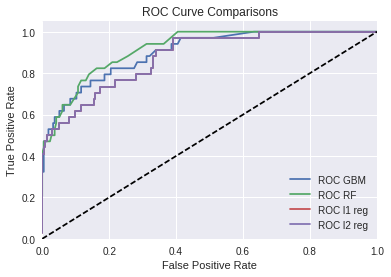

In [89]:
# ### Plot ROC curves

# ## Gradient Boosing
# fpr_GBM, tpr_GBM, _ = roc_curve(y_test, CV_GBM.predict_proba(X_test_std)[:,1])
# roc_auc_GBM = auc(fpr_GBM, tpr_GBM)
# print('ROC AUC GBM: %0.2f' % roc_auc_GBM)

# ## Random Forest
# fpr_rfc, tpr_rfc, _ = roc_curve(y_test, CV_rfc.predict_proba(X_test_std)[:,1])
# roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
# print('ROC AUC RF: %0.2f' % roc_auc_rfc)

# ## L1 Regression
# fpr_l1, tpr_l1, _ = roc_curve(y_test, CV_lr_l1.predict_proba(X_test_std)[:,1])
# roc_auc_l1 = auc(fpr_l1, tpr_l1)
# print('ROC AUC l1 reg: %0.2f' % roc_auc_l1)

# ## L2 Regression
# fpr_l2, tpr_l2, _ = roc_curve(y_test, CV_lr_l2.predict_proba(X_test_std)[:,1])
# roc_auc_l2 = auc(fpr_l2, tpr_l2)
# print('ROC AUC l2 reg: %0.2f' % roc_auc_l2)

# # Plot curves
# plt.figure()
# plt.plot(fpr_GBM, tpr_GBM, label='ROC GBM' % roc_auc_GBM)
# plt.plot(fpr_rfc, tpr_rfc, label='ROC RF' % roc_auc_rfc)
# plt.plot(fpr_l1, tpr_l1, label='ROC l1 reg' % roc_auc_l1)
# plt.plot(fpr_l2, tpr_l2, label='ROC l2 reg' % roc_auc_l2)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparisons')
# plt.legend(loc="lower right")
# plt.show()

In [92]:
def salary_predictions():
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import GradientBoostingClassifier
    
    # Initialize the dataframe, using the nodes as the index
    df = pd.DataFrame(index=G.nodes())

    # Get the department for each node
    df['Department'] = pd.Series(nx.get_node_attributes(G, 'Department'))
    df['ManagementSalary'] = pd.Series(nx.get_node_attributes(G,'ManagementSalary'))

    # Add the clustering coefficient and degree
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())

    #### Get the eccentricity and flag the center and periphery nodes - note that there are a few nodes that are completely 
    # disconnected - I will only calculate these values for the large connected componenet - all others will be given
    # the max eccentricity, periphery of 1 and center of 0

    graphs = list(nx.connected_component_subgraphs(G))

    # eccentricity
    eccentricity = nx.eccentricity(graphs[0])
    eccentricity =  pd.Series(eccentricity).to_frame()
    eccentricity.columns = ['eccentricity']

    # get nodes on the periphery
    periphery = nx.periphery(graphs[0])

    # Get nodes in the center
    center = nx.center(graphs[0])

    dist_measures = eccentricity

    # Add a flag for the center nodes
    center_nodes = []
    for row in dist_measures.index:
        if row in center:
            center_nodes.append(1)
        else:
            center_nodes.append(0)

    dist_measures['center'] = center_nodes

    # Add a flag for the periphery nodes
    periphery_nodes = []
    for row in dist_measures.index:
        if row in periphery:
            periphery_nodes.append(1)
        else:
            periphery_nodes.append(0)

    dist_measures['periphery'] = periphery_nodes

    df = df.merge(dist_measures,how = 'left', left_index = True, right_index = True)

    df[['center']] = df[['center']].fillna(0)
    df[['periphery']] = df[['periphery']].fillna(1)
    df[['eccentricity']] = df[['eccentricity']].fillna(max(df['eccentricity']))

    ### add degree centrality for every node
    df['degree_centrality'] = pd.Series(nx.degree_centrality(G))

    ### add closeness centrality for every node
    df['closeness_centrality'] = pd.Series(nx.closeness_centrality(G, normalized = True))

    ### add the page rank including a damping parameter
    df['page_rank'] = pd.Series(nx.pagerank(G, alpha = 0.8))

    ### add the hub and authority scores
    hits_scores = nx.hits(G)
    hub = pd.Series(hits_scores[0]).to_frame()
    hub.columns = ['hub']
    df = df.merge(hub,how = 'left', left_index = True, right_index = True)

    authority = pd.Series(hits_scores[1]).to_frame()
    authority.columns = ['authority']
    df = df.merge(authority,how = 'left', left_index = True, right_index = True)

    ### add betweeness centrality
    df['betweenness_centrality'] = pd.Series(nx.betweenness_centrality(G, normalized = True, endpoints = False))

    ### separate the training and validation data
    validation = df[df['ManagementSalary'].isnull()]
    validation.drop('ManagementSalary',axis = 1, inplace = True)

    train_test = df[df['ManagementSalary'].notnull()]

    ### standardize the data
    X_train = train_test.drop('ManagementSalary', axis = 1)
    y_train = train_test['ManagementSalary'] 
    
    X_valid = validation
    
    stdsc = StandardScaler()
    X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
    X_train_std.columns = X_train.columns

    X_valid_std = pd.DataFrame(stdsc.transform(X_valid))
    X_valid_std.columns = X_valid.columns
    
    # Keep only the required columns
    X_train_std = X_train_std[['eccentricity', 'center', 'periphery', 'degree_centrality',
                               'closeness_centrality', 'page_rank', 'hub', 'authority','betweenness_centrality']]
    X_valid_std = X_valid_std[['eccentricity', 'center', 'periphery', 'degree_centrality',
                               'closeness_centrality', 'page_rank', 'hub', 'authority','betweenness_centrality']]

    # Run the GBM with the optimal parameters 
    GBM = GradientBoostingClassifier(random_state = 0,
                                    n_estimators = 500,
                                    max_depth = 4,
                                    learning_rate = 0.01)

    GBM.fit(X_train_std, y_train)
    
    # Predict on the validation set and get the probabilities
    preds = pd.Series(GBM.predict_proba(X_valid_std)[:,1])
    preds.index = validation.index
    
    return preds

salary_predictions()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1       0.149350
2       0.976911
5       0.976320
8       0.081746
14      0.161698
18      0.242783
27      0.250569
30      0.115392
31      0.689395
34      0.017700
37      0.034232
40      0.092076
45      0.096516
54      0.357276
55      0.149717
60      0.129799
62      0.976320
65      0.988435
77      0.084538
79      0.325922
97      0.011945
101     0.014660
103     0.182729
108     0.327893
113     0.052442
122     0.016546
141     0.070876
142     0.976320
144     0.023247
145     0.053489
          ...   
913     0.010621
914     0.020780
915     0.011988
918     0.016775
923     0.010469
926     0.017304
931     0.012702
934     0.010469
939     0.010469
944     0.011988
945     0.010469
947     0.182911
950     0.356383
951     0.010469
953     0.010758
959     0.011988
962     0.010469
963     0.218104
968     0.011988
969     0.011988
974     0.011508
984     0.010469
987     0.011508
989     0.011988
991     0.011988
992     0.011988
994     0.011988
996     0.0119

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [4]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
#future_connections.head(10)

Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [4]:
# Initialize the dataframe, using the edges as the index

# ### Common neighbors
# future_connections['Common_Neighbors'] = future_connections.index.map(lambda emp: len(list(nx.common_neighbors(G, emp[0], emp[1]))))

# ### Jaccard Coefficient
# future_connections['Jaccard'] = [i[2] for i in nx.jaccard_coefficient(G, future_connections.index)]

# ### Resource Allocation
# future_connections['Resource_Allocation'] = [i[2] for i in nx.resource_allocation_index(G, future_connections.index)]

# ### Preferential Attachment
# future_connections['Preferential_Attachment'] = [i[2] for i in nx.preferential_attachment(G, future_connections.index)]

# ### Adamic Adar
# future_connections['Adamic_Adar'] = [i[2] for i in nx.adamic_adar_index(G, future_connections.index)]

# future_connections

,Future Connection,Common_Neighbors,Jaccard,Resource_Allocation,Preferential_Attachment,Adamic_Adar
"(6, 840)",0.0,9,0.073770,0.136721,2070,2.110314
"(4, 197)",0.0,2,0.015504,0.008437,3552,0.363528
"(620, 979)",0.0,0,0.000000,0.000000,28,0.000000
"(519, 872)",0.0,2,0.060606,0.039726,299,0.507553
"(382, 423)",0.0,0,0.000000,0.000000,205,0.000000
"(97, 226)",1.0,4,0.048193,0.036296,1575,0.843588
"(349, 905)",0.0,0,0.000000,0.000000,240,0.000000
"(429, 860)",0.0,0,0.000000,0.000000,816,0.000000
"(309, 989)",0.0,0,0.000000,0.000000,184,0.000000
"(468, 880)",0.0,1,0.019608,0.002882,672,0.170960


In [13]:
# ### Split the data into training, testing and validation

# from sklearn.model_selection import train_test_split

# validation = future_connections[future_connections['Future Connection'].isnull()]
# validation.drop('Future Connection',axis = 1, inplace = True)

# train_test = future_connections[future_connections['Future Connection'].notnull()]

# X = train_test.drop('Future Connection', axis = 1)
# y = train_test['Future Connection'] 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

# X_train

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Common_Neighbors,Jaccard,Resource_Allocation,Preferential_Attachment,Adamic_Adar
"(462, 719)",1,0.022727,0.004274,480,0.183307
"(370, 831)",0,0.000000,0.000000,36,0.000000
"(242, 998)",0,0.000000,0.000000,34,0.000000
"(116, 976)",11,0.113402,0.173485,2241,2.634657
"(521, 631)",0,0.000000,0.000000,64,0.000000
"(831, 916)",0,0.000000,0.000000,1,0.000000
"(855, 879)",0,0.000000,0.000000,5,0.000000
"(417, 691)",0,0.000000,0.000000,130,0.000000
"(234, 831)",0,0.000000,0.000000,51,0.000000
"(957, 960)",0,0.000000,0.000000,10,0.000000


In [14]:
# ### Standardize the data

# from sklearn.preprocessing import StandardScaler

# stdsc = StandardScaler()
# X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
# X_train_std.columns = X_train.columns

# X_test_std = pd.DataFrame(stdsc.transform(X_test))
# X_test_std.columns = X_test.columns

# X_train_std.head()

,Common_Neighbors,Jaccard,Resource_Allocation,Preferential_Attachment,Adamic_Adar
0,-0.191417,0.062499,-0.294089,-0.259659,-0.224830
1,-0.436744,-0.527818,-0.371450,-0.510208,-0.426676
2,-0.436744,-0.527818,-0.371450,-0.511336,-0.426676
3,2.261851,2.417681,2.769044,0.734071,2.474434
4,-0.436744,-0.527818,-0.371450,-0.494407,-0.426676


In [ ]:
# ### Random Forest ###
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score, roc_curve, auc
# from sklearn.model_selection import GridSearchCV

# rfc = RandomForestClassifier(random_state = 0) 

# param_grid = {'n_estimators': [25, 50, 100],
#               'max_features': ['auto', 'sqrt', 'log2']}
    
# CV_rfc = GridSearchCV(estimator=rfc, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_rfc.fit(X_train_std, y_train)

# # Check for overfitting by comparing the AUC of training and validation sets
# print('Accuracy of RF classifier on train set: {:.2f}'
#      .format(CV_rfc.score(X_train_std, y_train)))
# print('Accuracy of RF classifier on test set: {:.2f}'
#      .format(CV_rfc.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_rfc.best_estimator_

In [15]:
# ### L1 Regression ###
# from sklearn import linear_model
# from sklearn.linear_model import LassoCV
# from sklearn.model_selection import GridSearchCV

# lr_l1 = linear_model.LogisticRegression(penalty = 'l1', random_state = 0)

# param_grid = {'C': [1, 10, 100, 200, 500, 1000]}

# CV_lr_l1 = GridSearchCV(estimator=lr_l1, 
#                         param_grid=param_grid, 
#                         cv= 5, 
#                         scoring='roc_auc',
#                         n_jobs = -1)

# CV_lr_l1.fit(X_train_std, y_train)

# print('Accuracy of l1 reg classifier on train set: {:.2f}'
#      .format(CV_lr_l1.score(X_train_std, y_train)))
# print('Accuracy of l1 reg classifier on test set: {:.2f}'
#      .format(CV_lr_l1.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_lr_l1.best_estimator_

Accuracy of l1 reg classifier on train set: 0.91
Accuracy of l1 reg classifier on test set: 0.91


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# ## L2 Regression ###

# lr_l2 = linear_model.LogisticRegression(penalty = 'l2', random_state = 0)

# param_grid = {'C': [1, 10, 100, 200, 500, 1000]}

# CV_lr_l2 = GridSearchCV(estimator=lr_l2, 
#                         param_grid=param_grid, 
#                         cv= 5, 
#                         scoring='roc_auc',
#                         n_jobs = -1)

# CV_lr_l2.fit(X_train_std, y_train)
# print('Accuracy of l2 reg classifier on train set: {:.2f}'
#      .format(CV_lr_l2.score(X_train_std, y_train)))
# print('Accuracy of l2 reg classifier on test set: {:.2f}'
#      .format(CV_lr_l2.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_lr_l2.best_estimator_

Accuracy of l2 reg classifier on train set: 0.91
Accuracy of l2 reg classifier on test set: 0.91


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# ## SVM ###
# from sklearn.svm import SVC

# SVM = SVC(kernel='rbf', random_state = 0)
# param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10, 100],
#              'C': [0.01,0.1,0.5,1,10,100]}

# CV_SVM = GridSearchCV(estimator=SVM, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_SVM.fit(X_train_std, y_train)

# print('Accuracy of SVM classifier on train set: {:.2f}'
#      .format(CV_SVM.score(X_train_std, y_train)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(CV_SVM.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_SVM.best_estimator_

In [ ]:
# ### Gradient Boosting ####

# from sklearn.ensemble import GradientBoostingClassifier

# GBM = GradientBoostingClassifier(random_state = 0)

# param_grid = {'n_estimators': [100, 150, 200, 500],
#               'learning_rate': [0.001, 0.01, 0.1, 0.2],
#               'max_depth': [3,4,5]}

# CV_GBM = GridSearchCV(estimator=GBM, 
#                       param_grid=param_grid, 
#                       cv= 5, 
#                       scoring='roc_auc',
#                       n_jobs = -1)

# CV_GBM.fit(X_train_std, y_train)

# print('Accuracy of GBM classifier on train set: {:.2f}'
#      .format(CV_GBM.score(X_train_std, y_train)))
# print('Accuracy of GBM classifier on test set: {:.2f}'
#      .format(CV_GBM.score(X_test_std, y_test)))

# # get the best parameters from the CV
# CV_GBM.best_estimator_

In [ ]:
# # ### Plot ROC curves

# ## Gradient Boosing
# fpr_GBM, tpr_GBM, _ = roc_curve(y_test, CV_GBM.predict_proba(X_test_std)[:,1])
# roc_auc_GBM = auc(fpr_GBM, tpr_GBM)
# print('ROC AUC GBM: %0.2f' % roc_auc_GBM)

# ## Random Forest
# fpr_rfc, tpr_rfc, _ = roc_curve(y_test, CV_rfc.predict_proba(X_test_std)[:,1])
# roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
# print('ROC AUC RF: %0.2f' % roc_auc_rfc)

# ## L1 Regression
# fpr_l1, tpr_l1, _ = roc_curve(y_test, CV_lr_l1.predict_proba(X_test_std)[:,1])
# roc_auc_l1 = auc(fpr_l1, tpr_l1)
# print('ROC AUC l1 reg: %0.2f' % roc_auc_l1)

# ## L2 Regression
# fpr_l2, tpr_l2, _ = roc_curve(y_test, CV_lr_l2.predict_proba(X_test_std)[:,1])
# roc_auc_l2 = auc(fpr_l2, tpr_l2)
# print('ROC AUC l2 reg: %0.2f' % roc_auc_l2)

# # Plot curves
# plt.figure()
# plt.plot(fpr_GBM, tpr_GBM, label='ROC GBM' % roc_auc_GBM)
# plt.plot(fpr_rfc, tpr_rfc, label='ROC RF' % roc_auc_rfc)
# plt.plot(fpr_l1, tpr_l1, label='ROC l1 reg' % roc_auc_l1)
# plt.plot(fpr_l2, tpr_l2, label='ROC l2 reg' % roc_auc_l2)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparisons')
# plt.legend(loc="lower right")
# plt.show()

In [6]:
def new_connections_predictions():
    
    from sklearn import linear_model
    from sklearn.linear_model import LassoCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    
    ### Common neighbors
    future_connections['Common_Neighbors'] = future_connections.index.map(lambda emp: len(list(nx.common_neighbors(G, emp[0], emp[1]))))

    ### Jaccard Coefficient
    future_connections['Jaccard'] = [i[2] for i in nx.jaccard_coefficient(G, future_connections.index)]

    ### Resource Allocation
    future_connections['Resource_Allocation'] = [i[2] for i in nx.resource_allocation_index(G, future_connections.index)]

    ### Preferential Attachment
    future_connections['Preferential_Attachment'] = [i[2] for i in nx.preferential_attachment(G, future_connections.index)]

    ### Adamic Adar
    future_connections['Adamic_Adar'] = [i[2] for i in nx.adamic_adar_index(G, future_connections.index)]
    
    validation = future_connections[future_connections['Future Connection'].isnull()]
    validation.drop('Future Connection',axis = 1, inplace = True)

    train_test = future_connections[future_connections['Future Connection'].notnull()]
    
    X = train_test.drop('Future Connection', axis = 1)
    y = train_test['Future Connection'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)
    
    stdsc = StandardScaler()
    X_train_std = pd.DataFrame(stdsc.fit_transform(X_train))
    X_train_std.columns = X_train.columns

    X_test_std = pd.DataFrame(stdsc.transform(X_test))
    X_test_std.columns = X_test.columns

    validation_std = pd.DataFrame(stdsc.fit_transform(validation))
    validation_std.columns = validation.columns

    lr_l2 = linear_model.LogisticRegression(penalty = 'l2', 
                                            random_state = 0,
                                            C = 100)
    
    lr_l2.fit(X_train_std, y_train)
    
    # Predict on the validation set and get the probabilities
    preds = pd.Series(lr_l2.predict_proba(validation_std)[:,1])
    preds.index = validation.index
    
    return preds

new_connections_predictions()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(107, 348)    0.031302
(542, 751)    0.011260
(20, 426)     0.543633
(50, 989)     0.011373
(942, 986)    0.011496
(324, 857)    0.011358
(13, 710)     0.229937
(19, 271)     0.115608
(319, 878)    0.011413
(659, 707)    0.011272
(49, 843)     0.011448
(208, 893)    0.011299
(377, 469)    0.007287
(405, 999)    0.021352
(129, 740)    0.016088
(292, 618)    0.028096
(239, 689)    0.011421
(359, 373)    0.008781
(53, 523)     0.041447
(276, 984)    0.011442
(202, 997)    0.011466
(604, 619)    0.169139
(270, 911)    0.011419
(261, 481)    0.070169
(200, 450)    0.929833
(213, 634)    0.011225
(644, 735)    0.110151
(346, 553)    0.010946
(521, 738)    0.010418
(422, 953)    0.021072
                ...   
(672, 848)    0.011419
(28, 127)     0.947231
(202, 661)    0.010898
(54, 195)     0.999996
(295, 864)    0.011340
(814, 936)    0.011243
(839, 874)    0.011496
(139, 843)    0.011350
(461, 544)    0.010057
(68, 487)     0.009995
(622, 932)    0.011313
(504, 936)    0.016541
(479, 528) 